In [10]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import re
import numpy as np
import spacy

/home/mailan/anaconda3/envs/Mémoire/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#creating colormap
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors1 = ["lavender", "lightpink", "peachpuff"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors1)

colors2 = ["darkseagreen", "darkgreen","mediumpurple", "salmon", "palevioletred","lavender", "lightpink", "peachpuff", "mintcream", "cadetblue", "thistle", "lightyellow", "mintcream", "powderblue"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors2)

In [5]:
df=pd.read_csv("/home/mailan/Bureau/df_final.csv")

# Repondants

In [6]:
# Choix d'un simple "oui/non" dans la mesure où les expressions autour des répondants ne changent pas beaucoup
def check_repondants(annonce):
    regex_repondants = re.compile(r're?é?-?pon-?dan')
    if regex_repondants.search(annonce):
        return "Oui"
    else:
        return "Non"

In [7]:
df['Répondants'] = df['Annonces'].apply(check_repondants)

In [ ]:
# RÉPONDANTS ET ÉVO CHRONO

df_grouped = df.groupby(['Année', 'Répondants']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

# Certificat

In [13]:
# Choix d'un simple "oui/non" dans la mesure où les expressions autour des répondants ne changent pas beaucoup
def check_certificat(annonce):
    regex_certif = re.compile(r'cer-?ti-?fi-?ca')
    if regex_certif.search(annonce):
        return "Oui"
    else:
        return "Non"

In [14]:
df['Certificat'] = df['Annonces'].apply(check_certificat)

In [ ]:
# CERTIF ET ÉVO CHRONO

df_grouped = df.groupby(['Année', 'Certificat']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

# Adresse

In [15]:
nlp = spacy.load("./model-best")

/home/mailan/anaconda3/envs/Mémoire/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5.3 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [16]:
def extraire_adresse(annonce):
    spans_key = "sc"
    doc = nlp(annonce)
    adresse= ' '.join([span.text for span in doc.spans[spans_key] if span.label_=="ADRESSE"])
    return adresse

In [17]:
df["Adresse"] = df["Annonces"].apply(extraire_adresse)

# Intermédiaires

In [18]:
# Genre des intermédiaires


# Application de l'expression régulière et création de la nouvelle colonne "Genre"
F=re.compile(r"femme|fille|dame|demoiselle|particulière|veuve|citoyenne|la cit\.|dlle|mlle|la nommée|Madzme|Mad\.", re.IGNORECASE)
H=re.compile(r"homme|garçon|particulier|citoyen|le cit\.|sieur| le nommé|M\.|Monsieur", re.IGNORECASE)


conditions=[df['Adresse'].str.contains(F), df['Adresse'].str.contains(H)]
genre=["F","H"]
df["Genre de l'intermédiaire"]=np.select(conditions,genre, np.nan)

In [66]:
df["Genre de l'intermédiaire"].value_counts()

Genre de l'intermédiaire
nan    4397
H       470
F       197
Name: count, dtype: int64

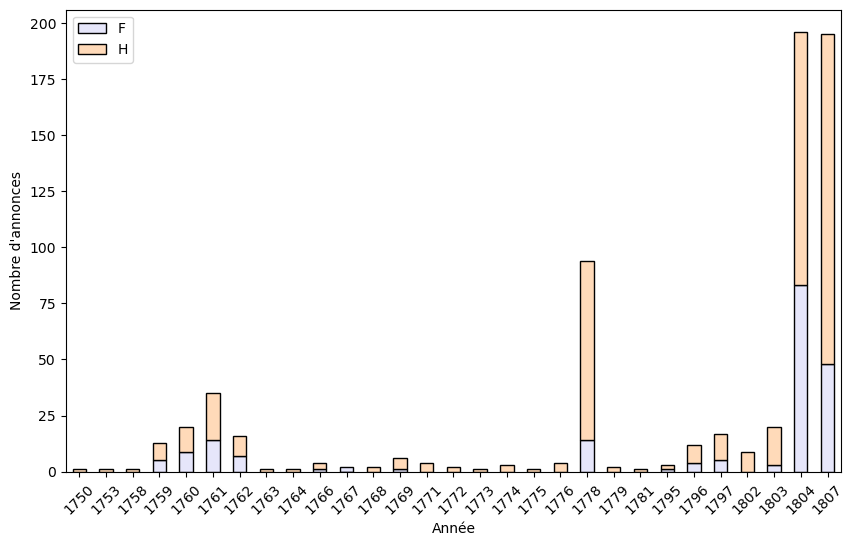

In [105]:
df_grouped = df.groupby(['Année', "Genre de l'intermédiaire"]).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [20]:
df.to_csv("/home/mailan/Bureau/df_final.csv", index=False)